In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# impport the data set
df = pd.read_csv('.\data\creditcard.csv')

In [5]:
# summary of the data set
df.shape

(284807, 31)

In [6]:
# peek the first a few data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Count the number of occurrences for each class (0 = non-fraud, 1 = fraud)
class_counts = df['Class'].value_counts()

# Print the counts for 0 and 1
print(class_counts)

# Optionally, you can separate the counts if needed
count_non_fraud = class_counts[0]  # Count of non-fraudulent transactions (Class = 0)
count_fraud = class_counts[1]      # Count of fraudulent transactions (Class = 1)

print(f"Non-Fraudulent Transactions (0): {count_non_fraud}")
print(f"Fraudulent Transactions (1): {count_fraud}")

0    284315
1       492
Name: Class, dtype: int64
Non-Fraudulent Transactions (0): 284315
Fraudulent Transactions (1): 492


In [8]:
# Loop through each column in the dataframe
for column in df.columns:
    # Get the min and max values for the current column
    min_value = df[column].min()
    max_value = df[column].max()
    
    # Display the results in one line
    print(f"Column: {column}, Min: {min_value}, Max: {max_value}")


Column: Time, Min: 0.0, Max: 172792.0
Column: V1, Min: -56.407509631329, Max: 2.45492999121121
Column: V2, Min: -72.7157275629303, Max: 22.0577289904909
Column: V3, Min: -48.3255893623954, Max: 9.38255843282114
Column: V4, Min: -5.68317119816995, Max: 16.8753440335975
Column: V5, Min: -113.743306711146, Max: 34.8016658766686
Column: V6, Min: -26.1605059358433, Max: 73.3016255459646
Column: V7, Min: -43.5572415712451, Max: 120.589493945238
Column: V8, Min: -73.2167184552674, Max: 20.0072083651213
Column: V9, Min: -13.4340663182301, Max: 15.5949946071278
Column: V10, Min: -24.5882624372475, Max: 23.7451361206545
Column: V11, Min: -4.79747346479757, Max: 12.0189131816199
Column: V12, Min: -18.6837146333443, Max: 7.8483920756446
Column: V13, Min: -5.79188120632084, Max: 7.12688295859376
Column: V14, Min: -19.2143254902614, Max: 10.5267660517847
Column: V15, Min: -4.49894467676621, Max: 8.87774159774277
Column: V16, Min: -14.1298545174931, Max: 17.3151115176278
Column: V17, Min: -25.1627993

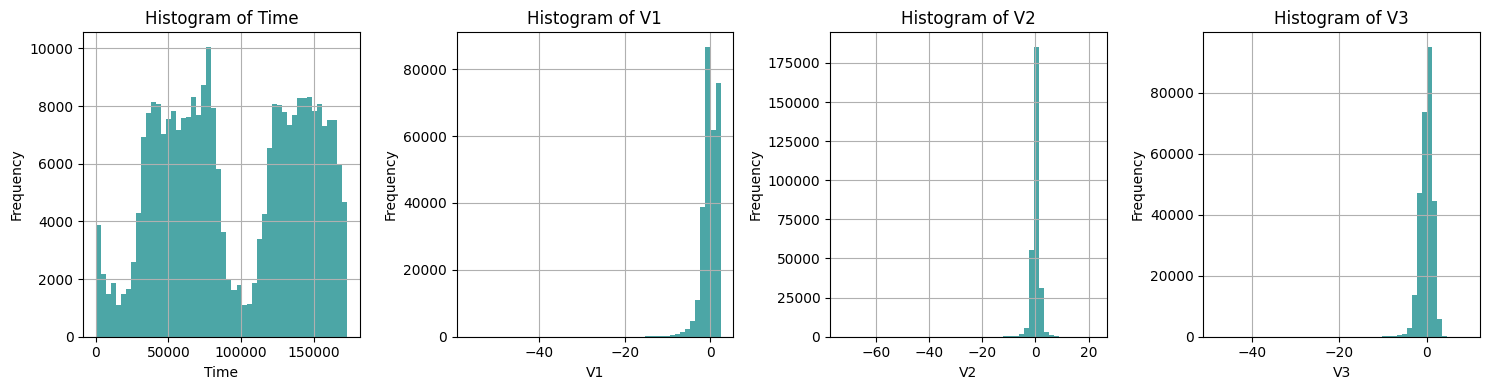

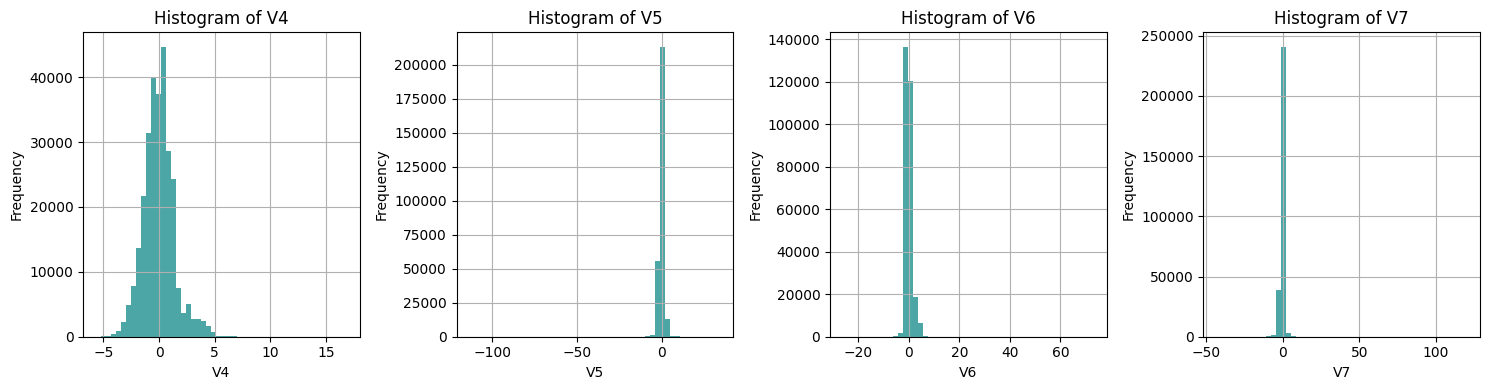

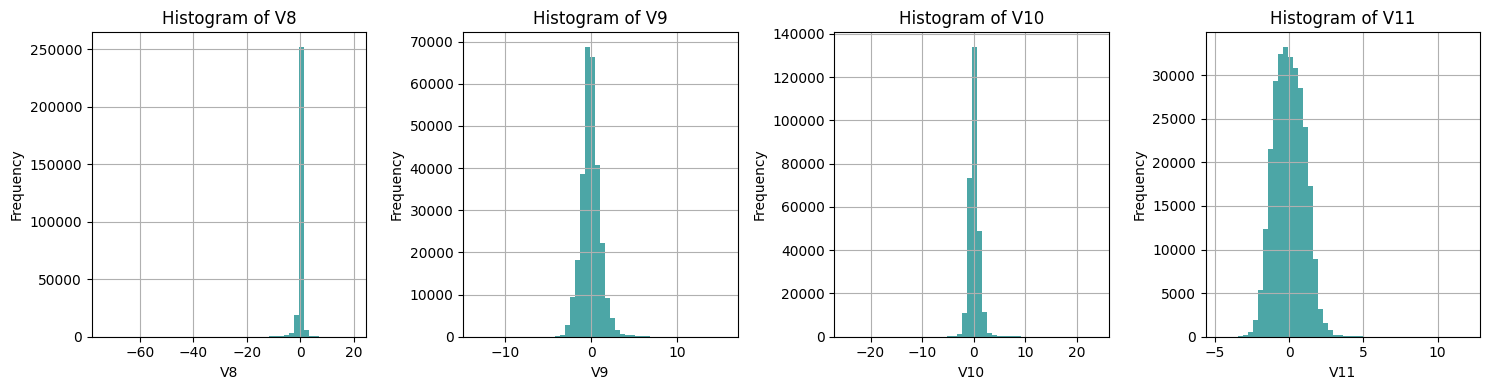

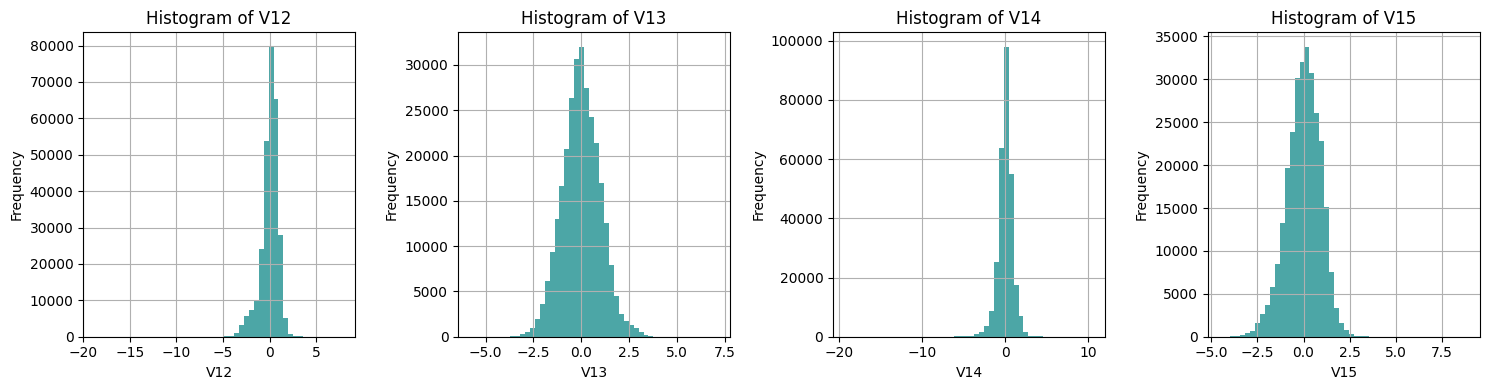

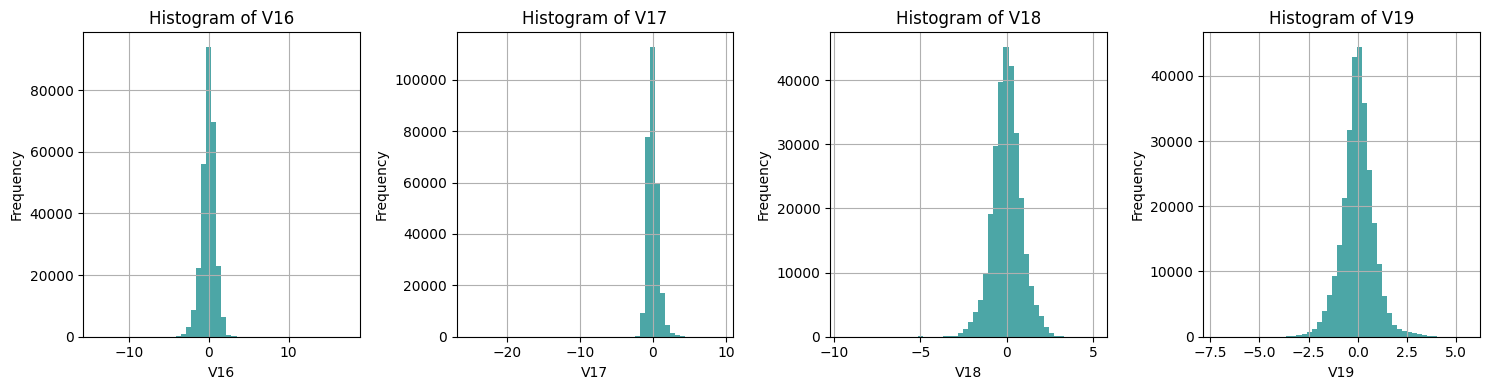

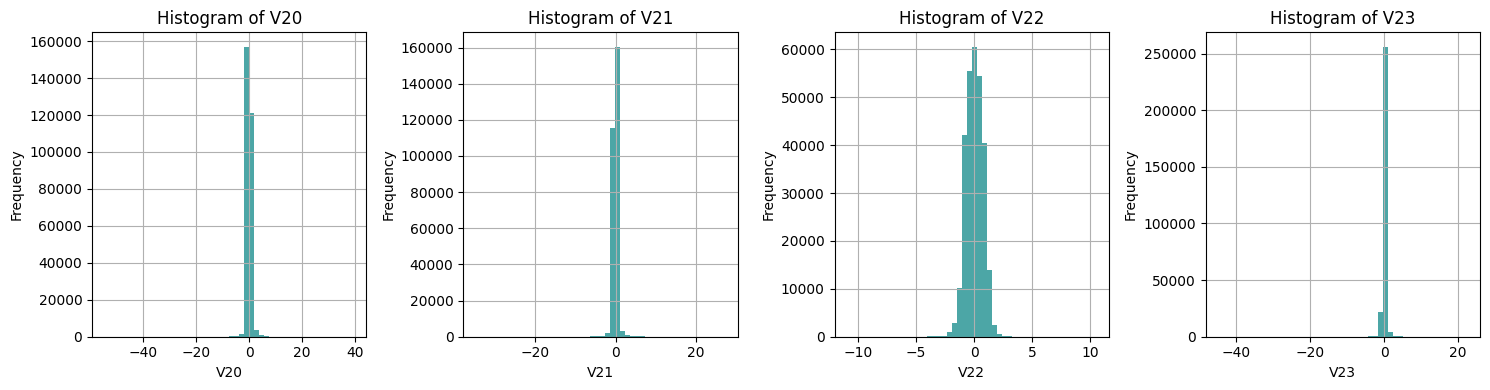

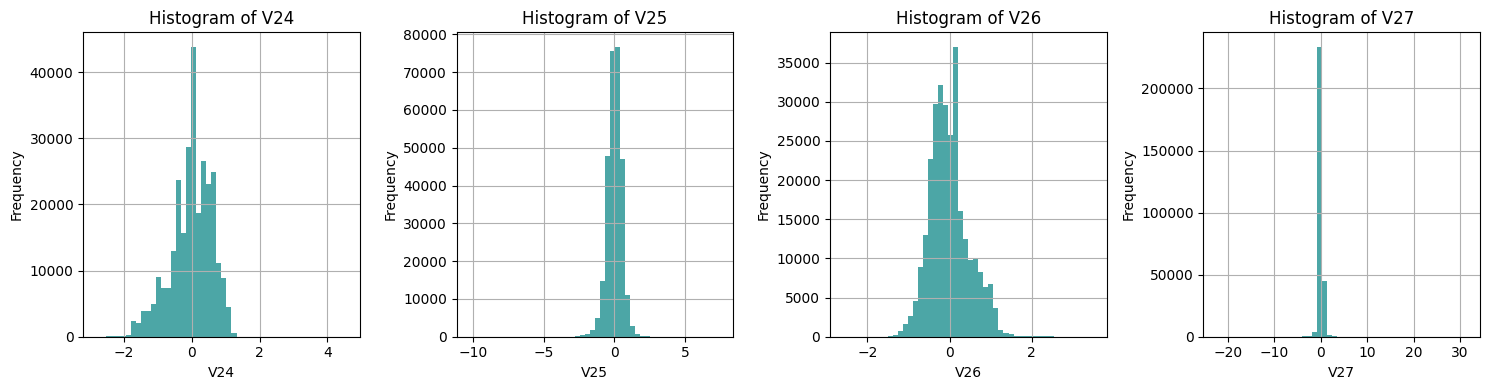

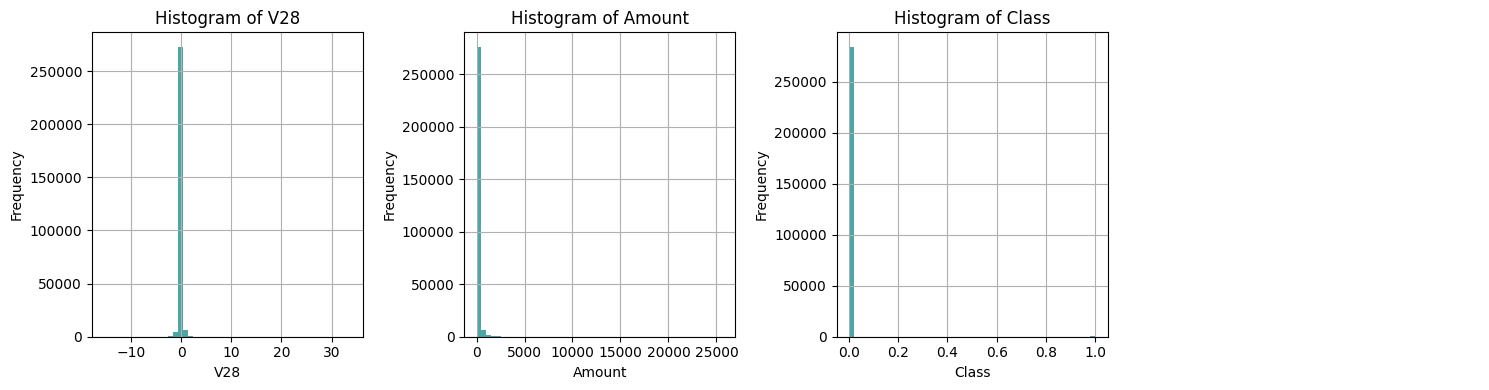

In [9]:
# view histogram data
# Get the list of columns
columns = df.columns

# Loop through the columns in groups of 4
for i in range(0, len(columns), 4):
    # Create a subplot with 1 row and 4 columns
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    # Plot the first four columns in the group
    for j in range(4):
        if i + j < len(columns):
            axes[j].hist(df[columns[i + j]], bins=50, color='teal', alpha=0.7)
            axes[j].set_title(f"Histogram of {columns[i + j]}")
            axes[j].set_xlabel(columns[i + j])
            axes[j].set_ylabel("Frequency")
            axes[j].grid(True)
        else:
            # If there is no column for this plot, hide the subplot
            axes[j].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [10]:
from sklearn.preprocessing import RobustScaler

# Separate the features (all columns except 'Class') and target ('Class' column)
features = df.drop(columns=['Class'])  # Features to be scaled
target = df['Class']  # The target column (Class)

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to the feature columns
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame, preserving the original column names
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the 'Class' column back to the DataFrame
scaled_df['Class'] = target

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -0.994983 -0.616237 -0.098602  1.228905  0.878152 -0.217859  0.631245   
1 -0.994983  0.524929  0.143100 -0.006970  0.293974  0.087726  0.164395   
2 -0.994972 -0.615587 -1.002407  0.830932  0.251024 -0.344345  1.778007   
3 -0.994972 -0.440239 -0.178789  0.841250 -0.529808  0.033775  1.303832   
4 -0.994960 -0.526089  0.579239  0.713861  0.265632 -0.270695  0.317183   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.177406  0.142432  0.334787  ...  0.026866  0.253109 -0.320791  0.032681   
1 -0.105740  0.117064 -0.164482  ... -0.473332 -0.602719  0.363442 -0.479557   
2  0.668164  0.420388 -1.179796  ...  0.668917  0.714254  2.974603 -0.919589   
3  0.175637  0.662489 -1.076888  ... -0.190105 -0.001408 -0.578786 -1.531963   
4  0.491625 -0.546463  0.700808  ...  0.048266  0.739092 -0.407980  0.126293   

        V25       V26       V27       V28    Amount  Class  
0  0.16

In [11]:
# Exploratory Data Analysis
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
scaled_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.118914,-0.008099,-0.046700,-0.093789,0.012467,0.041684,0.234978,-0.035663,-0.041715,0.041467,...,0.071003,-0.006333,0.036166,-0.051600,-0.024846,0.091805,-0.008291,-0.085674,0.927124,0.001727
std,0.557903,0.875976,1.177594,0.790721,0.889375,1.058858,1.141757,1.100116,2.228372,0.885825,...,1.770910,0.677653,2.017718,0.762671,0.780519,0.849087,2.493334,2.515117,3.495006,0.041527
min,-0.994983,-25.234901,-51.902285,-25.295389,-3.557406,-87.216663,-22.184587,-38.770014,-136.646287,-10.790391,...,-83.903734,-10.215599,-144.743845,-3.623671,-15.440333,-4.494188,-139.401862,-117.657402,-0.307413,0.000000
25%,-0.358210,-0.419712,-0.473542,-0.558111,-0.520605,-0.488876,-0.423451,-0.528388,-0.430967,-0.477061,...,-0.479648,-0.512775,-0.486782,-0.498118,-0.499713,-0.483936,-0.445883,-0.489209,-0.229162,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.641790,0.580288,0.526458,0.441889,0.479395,0.511124,0.576549,0.471612,0.569033,0.522939,...,0.520352,0.487225,0.513218,0.501882,0.500287,0.516064,0.554117,0.510791,0.770838,0.000000
max,1.035022,1.089805,15.683274,4.799177,10.612681,26.739834,63.054506,107.201520,37.286865,12.615676,...,65.656022,9.801353,72.828591,5.721572,11.234373,6.285011,195.267780,257.822531,358.683155,1.000000


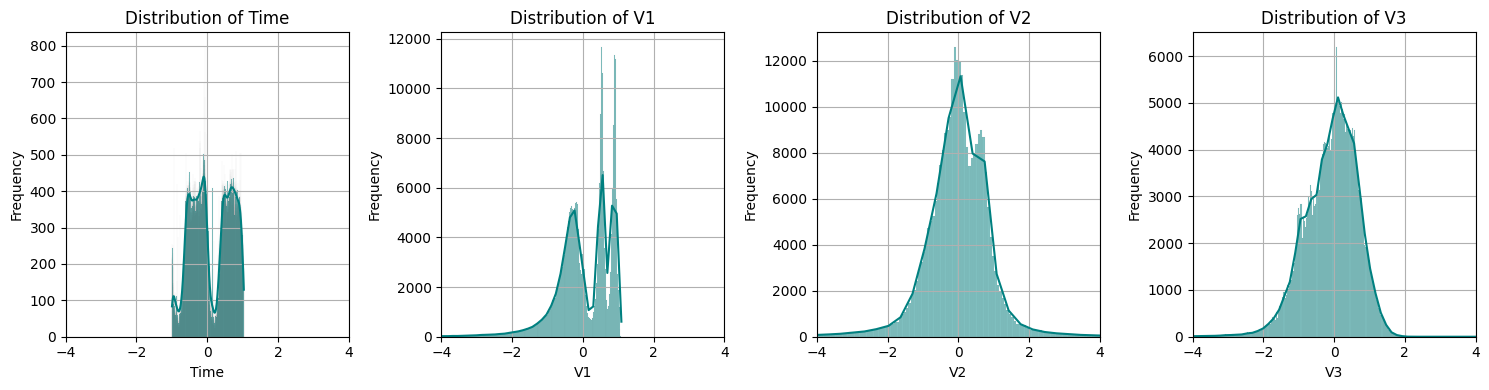

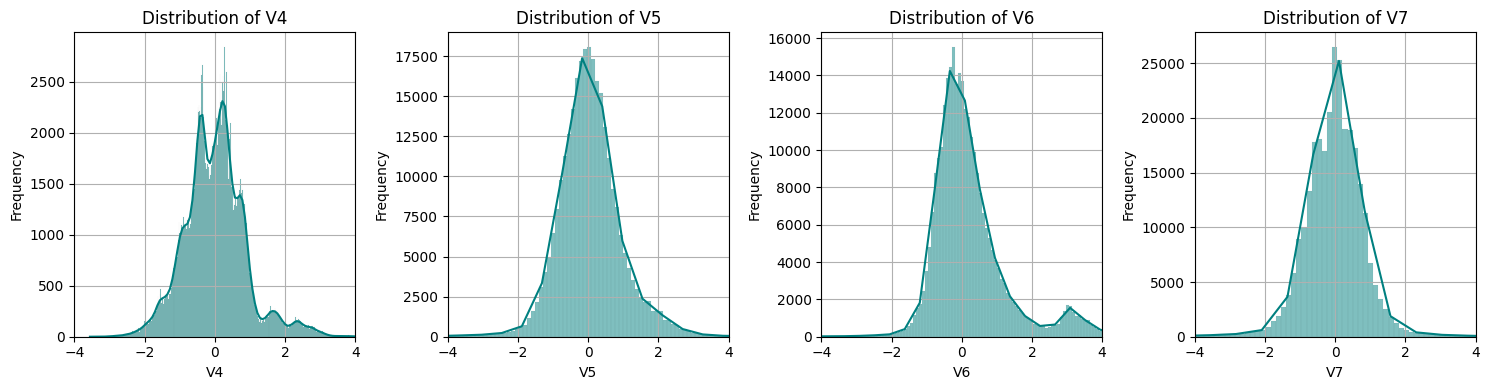

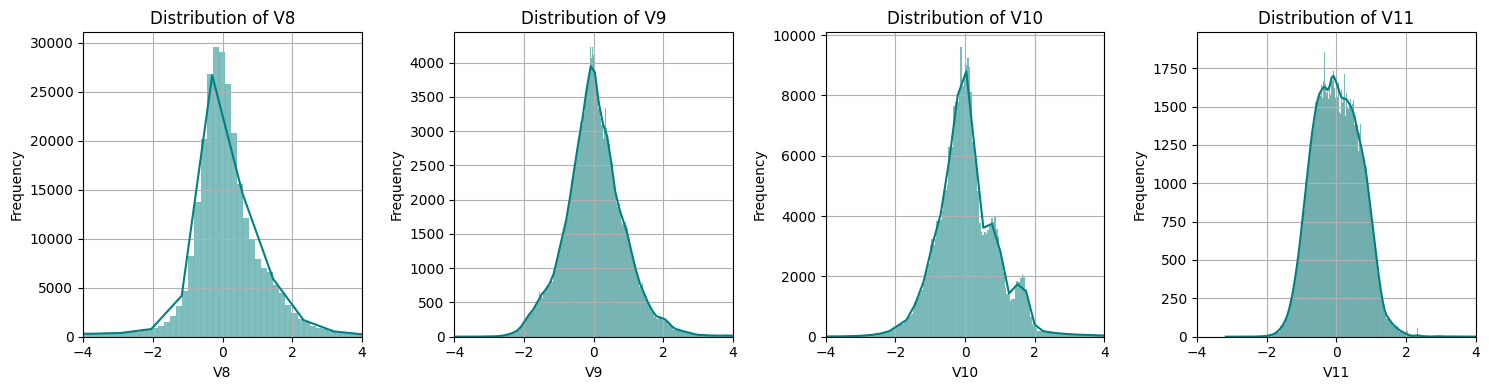

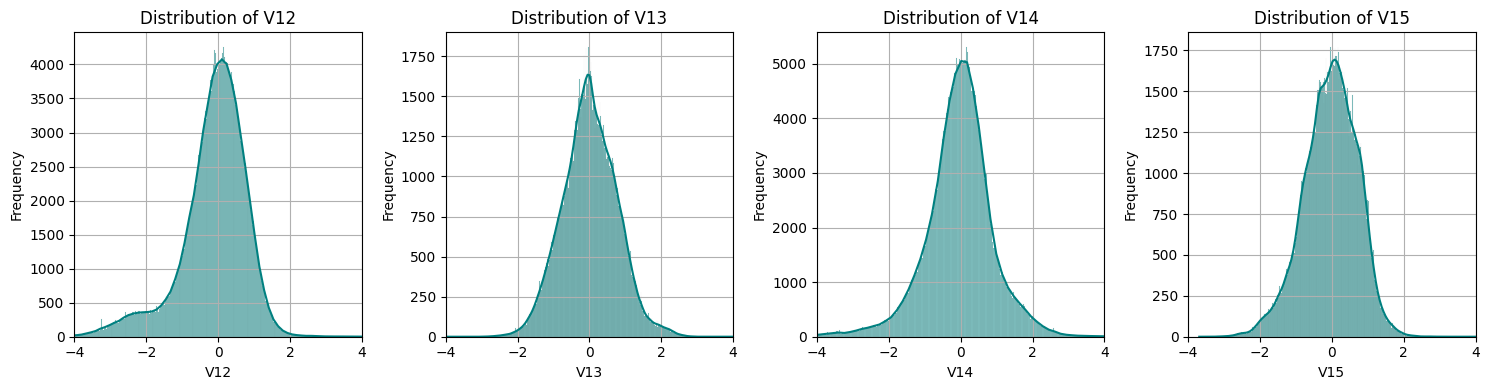

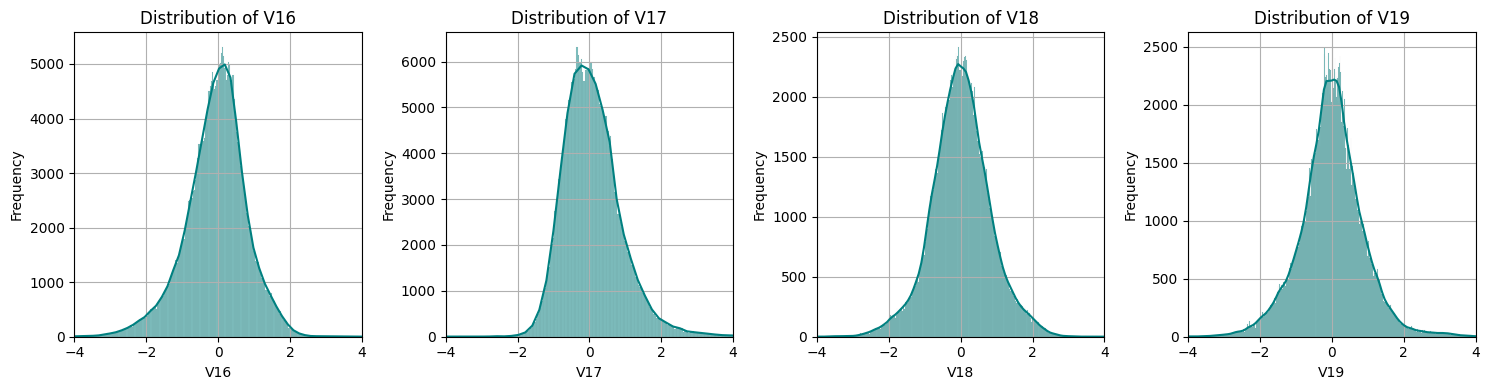

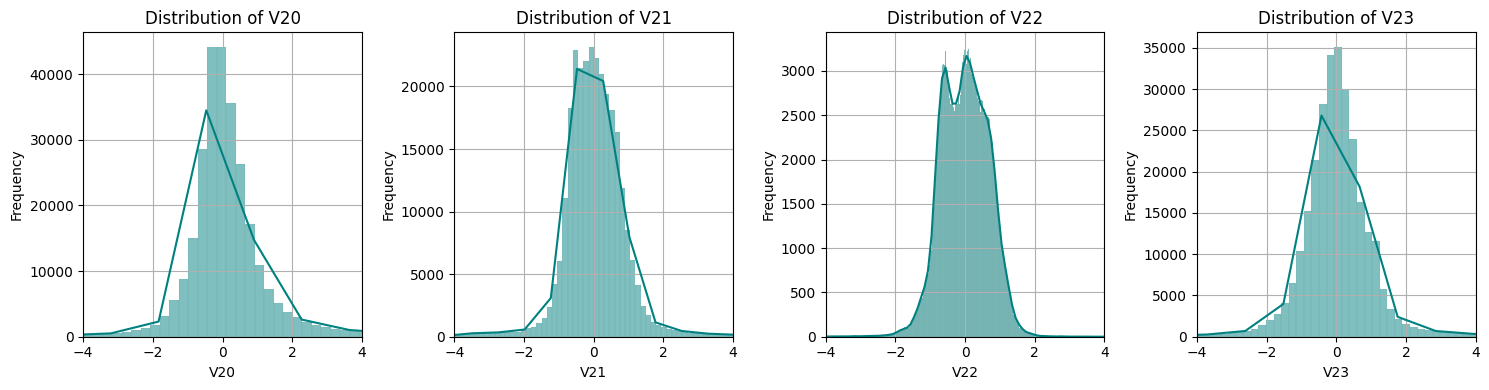

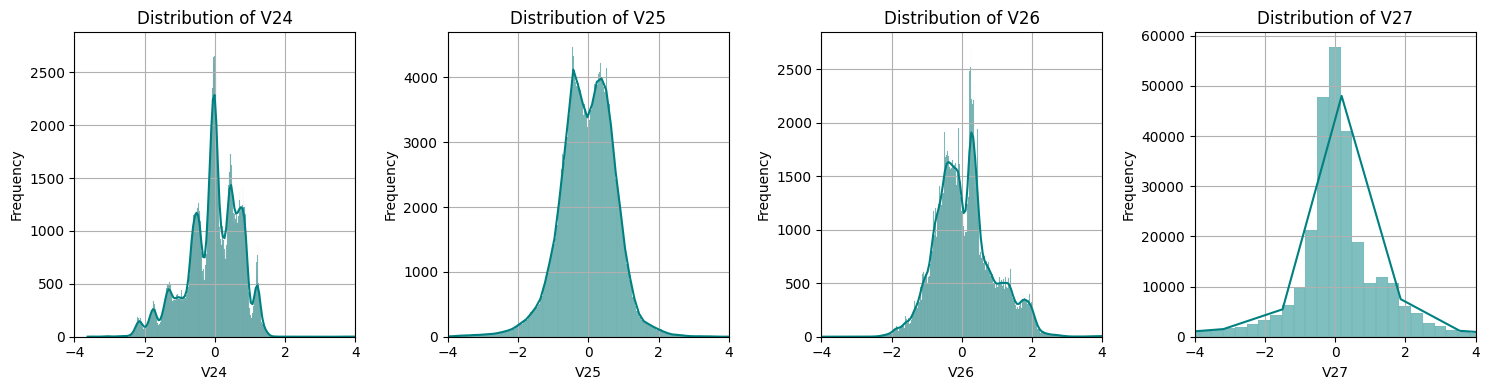

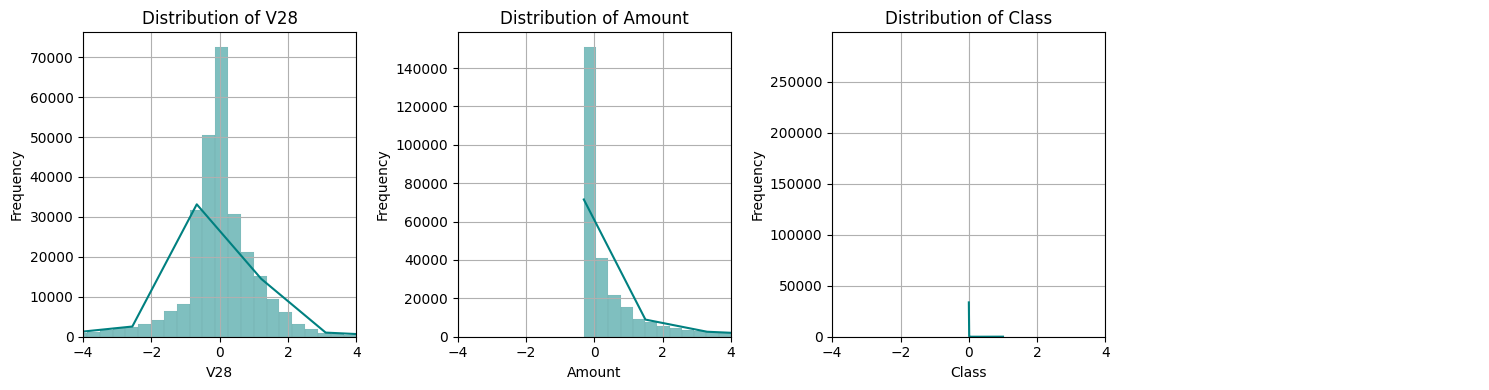

In [13]:
# Get the list of columns from scaled_df
columns = scaled_df.columns

# Loop through the columns in groups of 4
for i in range(0, len(columns), 4):
    # Create a subplot with 1 row and 4 columns
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))

    # Plot the first four columns in the group
    for j in range(4):
        if i + j < len(columns):
            sns.histplot(scaled_df[columns[i + j]], bins=1000, kde=True, color='teal', ax=axes[j])
            axes[j].set_title(f"Distribution of {columns[i + j]}")
            axes[j].set_xlabel(columns[i + j])
            axes[j].set_ylabel("Frequency")
            axes[j].grid(True)
            axes[j].set_xlim(-4, 4)  # Set x-limits to see the effect of scaling
        else:
            # If there is no column for this plot, hide the subplot
            axes[j].axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

In [14]:
scaled_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [28]:
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming scaled_df is your scaled dataset and 'Class' is the target column
X = scaled_df.drop(columns=['Class'])  # Features
y = scaled_df['Class']  # Target variable (fraud or non-fraud)

# List of class weights for class 1 (fraud) and test set percentages
class_weights = [5, 10, 12, 14, 15, 16, 18, 20, 50, 80, 100]
test_sizes = [0.4, 0.2]  # 60% train / 40% test, and 80% train / 20% test

# Record for storing model performances
results = []

# Total number of loops (iterations) for tracking progress
total_loops = len(class_weights) * len(test_sizes)
current_loop = 0  # Initialize the loop counter

# Display the start time before the process begins
print(f"\nOverall Process Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(time.time()))}")

# Loop over different test sizes and class weights
for test_size in test_sizes:
    for weight in class_weights:
        # Increment loop counter
        current_loop += 1
        
        # Record the start time for the loop
        loop_start_time = time.time()

        # Display start message for this iteration
        print(f"\nRound {current_loop}/{total_loops}: Started at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(loop_start_time))}, Class 1 weight = {weight}, Test Size = {int(test_size * 100)}%")

        # Split the data with the current test size
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Define class weights
        weight_class = {0: 1, 1: weight}
        
        # Initialize the RandomForestClassifier with class weights
        clf = RandomForestClassifier(class_weight=weight_class, random_state=42)
        
        # Start timing the training
        start_time = time.time()
        clf.fit(X_train, y_train)  # Train the model
        end_time = time.time()
        duration = end_time - start_time

        # Make predictions on the test set
        y_pred = clf.predict(X_test)

        # Get performance metrics
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
        
        # Capture relevant metrics directly from the classification report
        precision_fraud = report['Fraud']['precision']
        recall_fraud = report['Fraud']['recall']
        
        # Store the result (use values directly from the classification report to avoid rounding inconsistencies)
        results.append({
            'weight': weight,
            'test_size': int(test_size * 100),
            'precision_fraud': precision_fraud,
            'recall_fraud': recall_fraud,
            'confusion_matrix': cm,
            'classification_report': classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']),  # Store the full report
            'duration': f"{int(duration // 60)} minutes and {int(duration % 60)} seconds"
        })
        
        # Record the end time for the loop and calculate loop duration
        loop_end_time = time.time()
        loop_duration = loop_end_time - loop_start_time

        # Display end message for this iteration
        print(f"Round {current_loop}/{total_loops}: Completed at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(loop_end_time))}, Class 1 weight = {weight}, Test Size = {int(test_size * 100)}%")
        print(f"Precision (Fraud) = {precision_fraud:.2f}, Recall (Fraud) = {recall_fraud:.2f}, Duration = {int(loop_duration // 60)} minutes and {int(loop_duration % 60)} seconds")

# Display the final end time of the whole process
overall_end_time = time.time()
print(f"\nOverall Process End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_end_time))}")
overall_duration = overall_end_time - loop_start_time
print(f"Overall Duration: {int(overall_duration // 60)} minutes and {int(overall_duration % 60)} seconds")

# Lower the precision threshold to 0.97 for top models
top_precision_threshold = 0.97

# Filter models that have precision >= 0.97 for class 1 (fraud)
top_models = [r for r in results if r['precision_fraud'] >= top_precision_threshold]

# Sort by recall of fraud (higher is better) and select the top 2 models
top_models_sorted = sorted(top_models, key=lambda x: x['recall_fraud'], reverse=True)[:2]

# Find the worst model based on recall of fraud (lowest recall)
worst_model = sorted(results, key=lambda x: x['recall_fraud'])[0]

# Display results for top 2 models
if top_models_sorted:
    print("\nTop 2 Best Models (Precision of Fraud >= 0.97 and Highest Recall of Fraud):")
    for idx, model in enumerate(top_models_sorted, 1):
        print(f"\nModel {idx}: Class 1 Weight = {model['weight']}, Test Size = {model['test_size']}%")
        print(f"Precision (Fraud): {model['precision_fraud']:.2f}, Recall (Fraud): {model['recall_fraud']:.2f}")
        print(f"Confusion Matrix:\n{model['confusion_matrix']}")
        print(f"Classification Report:\n{model['classification_report']}")  # Consistent display of the report
        print(f"Training Duration: {model['duration']}")
else:
    print("\nNo models found with Precision of Fraud >= 0.97.")

# Display results for the worst model
print("\nWorst Performing Model (Lowest Recall of Fraud):")
print(f"Class 1 Weight = {worst_model['weight']}, Test Size = {worst_model['test_size']}%")
print(f"Precision (Fraud): {worst_model['precision_fraud']:.2f}, Recall (Fraud): {worst_model['recall_fraud']:.2f}")
print(f"Confusion Matrix:\n{worst_model['confusion_matrix']}")
print(f"Classification Report:\n{worst_model['classification_report']}")
print(f"Training Duration: {worst_model['duration']}")



Overall Process Start Time: 2024-10-10 12:57:18

Round 1/22: Started at 2024-10-10 12:57:18, Class 1 weight = 5, Test Size = 40%
Round 1/22: Completed at 2024-10-10 12:59:30, Class 1 weight = 5, Test Size = 40%
Precision (Fraud) = 0.95, Recall (Fraud) = 0.79, Duration = 2 minutes and 11 seconds

Round 2/22: Started at 2024-10-10 12:59:30, Class 1 weight = 10, Test Size = 40%
Round 2/22: Completed at 2024-10-10 13:01:42, Class 1 weight = 10, Test Size = 40%
Precision (Fraud) = 0.96, Recall (Fraud) = 0.79, Duration = 2 minutes and 12 seconds

Round 3/22: Started at 2024-10-10 13:01:42, Class 1 weight = 12, Test Size = 40%
Round 3/22: Completed at 2024-10-10 13:03:49, Class 1 weight = 12, Test Size = 40%
Precision (Fraud) = 0.97, Recall (Fraud) = 0.79, Duration = 2 minutes and 6 seconds

Round 4/22: Started at 2024-10-10 13:03:49, Class 1 weight = 14, Test Size = 40%
Round 4/22: Completed at 2024-10-10 13:05:55, Class 1 weight = 14, Test Size = 40%
Precision (Fraud) = 0.96, Recall (Fraud


# Model Evaluation Explanation

This markdown provides an explanation of the model's performance, particularly for **Model 1: Class 1 Weight = 10, Test Size = 20%**.

## 1. Precision (Fraud) and Recall (Fraud)

- **Precision (Fraud = 0.99)**: 
    - Precision answers the question: "Of all the fraud cases predicted by the model, how many are truly fraud?"
    - In this case, a **precision of 0.99** means that 99% of the predicted fraud cases were actual frauds, while 1% of them were incorrectly predicted as fraud when they were not.
  
- **Recall (Fraud = 0.79)**: 
    - Recall answers the question: "Of all the actual fraud cases, how many were correctly identified by the model?"
    - In this case, a **recall of 0.79** means that the model correctly identified 79% of the actual fraud cases, but it missed 21% of them.

## 2. Confusion Matrix

The confusion matrix shows the number of correct and incorrect predictions for each class (Non-Fraud and Fraud).

```
[[56863     1]
 [   21    77]]
```

- **56863 (True Negatives)**: The model correctly predicted 56,863 Non-Fraud cases.
- **1 (False Positive)**: The model incorrectly predicted 1 case as fraud when it was actually non-fraud.
- **21 (False Negatives)**: The model missed 21 fraud cases.
- **77 (True Positives)**: The model correctly identified 77 fraud cases.

## 3. Classification Report

```
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962
```

- **Non-Fraud**:
  - **Precision**: 1.00 (100% accurate for Non-Fraud cases).
  - **Recall**: 1.00 (Correctly identified all Non-Fraud cases).
  - **Support**: 56,864 (Total number of Non-Fraud cases).

- **Fraud**:
  - **Precision**: 0.99 (99% of predicted fraud cases were actual fraud).
  - **Recall**: 0.79 (The model correctly identified 79% of the actual fraud cases).
  - **F1-Score**: 0.88 (The harmonic mean of precision and recall).

## 4. Overall Metrics

```
    accuracy                           1.00     56962
    macro avg       0.99      0.89      0.94     56962
    weighted avg    1.00      1.00      1.00     56962
```

- **Accuracy**: 1.00 (The model correctly predicted nearly all samples, but the imbalance of the dataset affects this value).

- **Macro Average**: The average precision and recall across both classes without considering class imbalance.

- **Weighted Average**: This takes class imbalance into account and reflects a more accurate measure for imbalanced datasets like this one.

### Summary:
- The model is very **precise** in predicting fraud but has a **moderate recall** (misses 21% of actual fraud cases).
- The high overall **accuracy** is primarily due to the model's strong performance on the majority Non-Fraud class.


In [ ]:

# Further tuning the model

Improving the recall for fraud detection is crucial in fraud detection tasks, as recall focuses on reducing false negatives (i.e., missed fraud cases). Below are several strategies you can apply to improve the recall of your model.

## 1. Tune the Class Weights Further

We have already used class weights to give more importance to the minority class (fraud). And the recall is still not high enough, we cab try increasing the class weight for the fraud cases (class 1) further. Currently, you are using weights like 5, 10, 12, 14, etc. We can try increasing them even more, e.g., to values like 150, 200, etc.

## 2. Change the Decision Threshold

By default, classifiers like RandomForest use a probability threshold of 0.5 for classification. You can adjust this threshold to increase the recall. Lowering the threshold will increase the sensitivity of detecting fraud cases at the cost of precision (you might detect more fraud, but you'll also increase false positives).


In [30]:
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

# Assuming scaled_df is your scaled dataset and 'Class' is the target column
X = scaled_df.drop(columns=['Class'])  # Features
y = scaled_df['Class']  # Target variable (fraud or non-fraud)

# Define class weights and thresholds to loop through
weight_classes = [150, 200, 500, 1000]
thresholds = [0.3, 0.35, 0.40, 0.45]
test_size = 0.2  # Fixed at 20% test size

# Initialize list to store results
results = []

# Display the start time before the progress bar starts
overall_start_time = time.time()
tqdm.write(f"\nOverall Process Start Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_start_time))}")

# Initialize tqdm progress bar
total_iterations = len(weight_classes) * len(thresholds)
pbar = tqdm(total=total_iterations, desc="Model Training Progress", ncols=100)

# Loop over class weights and thresholds
for weight in weight_classes:
    for threshold in thresholds:
        # Record the start time for the loop
        loop_start_time = time.time()

        # Output information about the start of training
        tqdm.write(f"\nStarting training with class 1 weight = {weight}, threshold = {threshold:.2f}, test size = 20%, at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(loop_start_time))}")

        # Split the data with the fixed test size
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Define class weights
        weight_class = {0: 1, 1: weight}

        # Initialize the RandomForestClassifier with class weights
        clf = RandomForestClassifier(class_weight=weight_class, random_state=42)

        # Start timing the training
        start_time = time.time()
        clf.fit(X_train, y_train)  # Train the model
        end_time = time.time()
        duration = end_time - start_time

        # Predict probabilities instead of labels
        y_probs = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (fraud)

        # Apply the threshold to classify
        y_pred_threshold = (y_probs >= threshold).astype(int)

        # Get performance metrics
        cm = confusion_matrix(y_test, y_pred_threshold)
        report = classification_report(y_test, y_pred_threshold, target_names=['Non-Fraud', 'Fraud'], output_dict=True)

        # Capture relevant metrics (formatted to 4 decimal places)
        precision_fraud = report['Fraud']['precision']
        recall_fraud = report['Fraud']['recall']
        f1_fraud = report['Fraud']['f1-score']
        accuracy = report['accuracy']

        # Store the result
        results.append({
            'weight_class': weight,
            'threshold': threshold,
            'precision_fraud': float(f"{precision_fraud:.4f}"),
            'recall_fraud': float(f"{recall_fraud:.4f}"),
            'f1_fraud': float(f"{f1_fraud:.4f}"),
            'accuracy': float(f"{accuracy:.4f}"),
            'confusion_matrix': cm,
            'duration': f"{int(duration // 60)} minutes and {int(duration % 60)} seconds"
        })

        # Update progress bar and display loop completion
        pbar.update(1)
        loop_end_time = time.time()
        loop_duration = loop_end_time - loop_start_time
        tqdm.write(f"Completed training with class 1 weight = {weight}, threshold = {threshold:.2f}")
        tqdm.write(f"Loop Duration: {int(loop_duration // 60)} minutes and {int(loop_duration % 60)} seconds")
        tqdm.write(f"Precision (Fraud): {precision_fraud:.4f}, Recall (Fraud): {recall_fraud:.4f}")

# Close the progress bar
pbar.close()

# Display the final end time of the whole process
overall_end_time = time.time()
tqdm.write(f"\nOverall Process End Time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(overall_end_time))}")
overall_duration = overall_end_time - overall_start_time
tqdm.write(f"Overall Duration: {int(overall_duration // 60)} minutes and {int(overall_duration % 60)} seconds")

# Sort results by F1-Score (Fraud) in descending order
sorted_results = sorted(results, key=lambda x: x['f1_fraud'], reverse=True)

# Display the top 2 models with the highest F1-Score (Fraud)
print("\nTop 2 Models with the Highest F1-Score (Fraud):")
for result in sorted_results[:2]:  # Top 2 models
    print(f"\nClass Weight = {result['weight_class']}, Threshold = {result['threshold']:.2f}")
    print(f"Precision (Fraud): {result['precision_fraud']:.4f}, Recall (Fraud): {result['recall_fraud']:.4f}, F1-Score (Fraud): {result['f1_fraud']:.4f}, Accuracy: {result['accuracy']:.4f}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")
    print(f"Training Duration: {result['duration']}")

# Display the model with the lowest F1-Score (Fraud)
worst_model = sorted_results[-1]  # Lowest model
print("\nModel with the Lowest F1-Score (Fraud):")
print(f"\nClass Weight = {worst_model['weight_class']}, Threshold = {worst_model['threshold']:.2f}")
print(f"Precision (Fraud): {worst_model['precision_fraud']:.4f}, Recall (Fraud): {worst_model['recall_fraud']:.4f}, F1-Score (Fraud): {worst_model['f1_fraud']:.4f}, Accuracy: {worst_model['accuracy']:.4f}")
print(f"Confusion Matrix:\n{worst_model['confusion_matrix']}")
print(f"Training Duration: {worst_model['duration']}")



Overall Process Start Time: 2024-10-10 14:42:45

Round 1/16: Class 1 Weight = 150, Threshold = 0.30, Test Size = 20%, at 2024-10-10 14:42:45
Completed at 2024-10-10 14:45:10, Duration = 2 minutes and 25 seconds
Precision (Fraud): 0.9634, Recall (Fraud): 0.8061

Round 2/16: Class 1 Weight = 150, Threshold = 0.35, Test Size = 20%, at 2024-10-10 14:45:10
Completed at 2024-10-10 14:47:36, Duration = 2 minutes and 25 seconds
Precision (Fraud): 0.9750, Recall (Fraud): 0.7959

Round 3/16: Class 1 Weight = 150, Threshold = 0.40, Test Size = 20%, at 2024-10-10 14:47:36
Completed at 2024-10-10 14:50:01, Duration = 2 minutes and 24 seconds
Precision (Fraud): 0.9747, Recall (Fraud): 0.7857

Round 4/16: Class 1 Weight = 150, Threshold = 0.45, Test Size = 20%, at 2024-10-10 14:50:01
Completed at 2024-10-10 14:52:25, Duration = 2 minutes and 24 seconds
Precision (Fraud): 0.9747, Recall (Fraud): 0.7857

Round 5/16: Class 1 Weight = 200, Threshold = 0.30, Test Size = 20%, at 2024-10-10 14:52:25
Comple

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming scaled_df is your scaled dataset and 'Class' is the target column
X = scaled_df.drop(columns=['Class'])  # Features
y = scaled_df['Class']  # Target variable (fraud or non-fraud)

test_size = 0.2  # Fixed at 20%

# Split the data with the fixed test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)


In [49]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Train the XGBoost model
clf_xgb = xgb.XGBClassifier(scale_pos_weight=15, random_state=42)  # Removed use_label_encoder
clf_xgb.fit(X_train, y_train)

# Evaluate XGBoost model
y_pred_xgb = clf_xgb.predict(X_test)

# Confusion Matrix
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-Fraud', 'Fraud']))


Confusion Matrix (XGBoost):
[[56862     2]
 [   17    81]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.98      0.83      0.90        98

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import time
import os
from datetime import datetime

# Function to check if XGBoost can use CUDA
def is_xgboost_cuda_available():
    try:
        # Check if XGBoost's GPU data structure exists
        xgb_runnable = xgb.DeviceQuantileDMatrix is not None
        return xgb_runnable
    except AttributeError:
        return False

# Decide if we use GPU based on XGBoost's CUDA availability
if is_xgboost_cuda_available():
    device_param = 'cuda'
    print("XGBoost CUDA is available. Using GPU to speed up training.")
else:
    device_param = None
    print("XGBoost CUDA is not available. Using CPU for training.")

# Apply SMOTE to the training set
print("Applying SMOTE to resample the training data...")
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Prepare DMatrix (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train_sm, label=y_train_sm)
dtest = xgb.DMatrix(X_test)

# Define parameter grid for grid search
param_grid = {
    'scale_pos_weight': [5, 10, 12, 15],   
    'learning_rate': [0.03, 0.05],         
    'max_depth': [7, 9],                   
    'gamma': [0.1, 0.3],  
    'subsample': [0.8, 0.85],              
    'colsample_bytree': [0.8, 0.85],       
}

# Track results
best_f1_score = 0
best_params = {}
best_classification_report = ""
results = []

# Number of boosting rounds (trees)
num_boost_round = 250

# Perform grid search over parameter combinations
grid = ParameterGrid(param_grid)
total_combinations = len(grid)

# General process start time
start_time = datetime.now()

# Initialize a progress bar
pbar = tqdm(total=total_combinations, desc="Grid Search Progress", ncols=100)

# Loop through the grid
for idx, params in enumerate(grid):
    pbar.set_description(f"Trying {idx+1}/{total_combinations}: {params}")
    
    # Train the XGBoost model with the updated tree_method and device parameters
    bst_params = {**params, 'objective': 'binary:logistic', 'tree_method': 'hist', 'eval_metric': 'logloss'}
    
    if device_param == 'cuda':
        bst_params['device'] = 'cuda'

    bst = xgb.train(
        bst_params,
        dtrain,
        num_boost_round=num_boost_round,
        evals=[(dtrain, 'train')],
        verbose_eval=False
    )
    
    # Adjust threshold for classification
    threshold = 0.5
    y_pred_probs = bst.predict(dtest)
    y_pred_sm = (y_pred_probs >= threshold).astype(int)
    
    # Calculate performance metrics
    report = classification_report(y_test, y_pred_sm, target_names=['Non-Fraud', 'Fraud'], output_dict=True)
    confusion = confusion_matrix(y_test, y_pred_sm)
    precision_fraud = report['Fraud']['precision']
    recall_fraud = report['Fraud']['recall']
    f1_fraud = report['Fraud']['f1-score']
    
    # Save the results
    results.append({
        'params': params,
        'precision_fraud': precision_fraud,
        'recall_fraud': recall_fraud,
        'f1_fraud': f1_fraud,
        'confusion_matrix': confusion,
        'classification_report': classification_report(y_test, y_pred_sm, target_names=['Non-Fraud', 'Fraud'])
    })
    
    # Track the best model based on F1-score for fraud
    if f1_fraud > best_f1_score:
        best_f1_score = f1_fraud
        best_params = params
        best_classification_report = classification_report(y_test, y_pred_sm, target_names=['Non-Fraud', 'Fraud'])
    
    # Add a sleep interval to allow GPU to cool down
    time.sleep(7.0)
    
    # Update progress bar with the current step
    pbar.update(1)

# Close the progress bar
pbar.close()

# General process end time
end_time = datetime.now()
total_duration = end_time - start_time

# Sort and display top 5 results
sorted_results = sorted(results, key=lambda x: x['f1_fraud'], reverse=True)[:5]

# Well-formatted output
print("\nTop 5 Results (Sorted by F1-Score for Fraud):")
for idx, result in enumerate(sorted_results):
    print(f"\nModel {idx+1}:")
    print(f"Params: {result['params']}")
    print(f"Precision (Fraud): {result['precision_fraud']:.4f}, Recall (Fraud): {result['recall_fraud']:.4f}, F1-score (Fraud): {result['f1_fraud']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])
    print("-" * 80)

# Display the best parameters and their corresponding performance
print("\nBest Parameters Found:")
print(best_params)
print(f"Best F1-score for Fraud: {best_f1_score:.4f}")
print("Full Classification Report for Best Parameters:")
print(best_classification_report)

# Display the general process start time, end time, and total duration
print(f"\nGeneral Process Start Time: {start_time}")
print(f"General Process End Time: {end_time}")
print(f"Total Duration: {total_duration}")


XGBoost CUDA is available. Using GPU to speed up training.
Applying SMOTE to resample the training data...


Trying 66/128: {'colsample_bytree': 0.85, 'gamma': 0.1, 'learning_rate': 0.03, 'max_depth': 7, 'scal

In [53]:
# try Try Ensemble Models (Bagging or Boosting)
# Ensemble methods such as bagging (e.g., RandomForest) or boosting (e.g., XGBoost) can improve recall because they combine multiple weak models to form a stronger predictive model. XGBoost, for example, can improve the ability to detect fraud by focusing more on the hard-to-classify cases.
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm
import xgboost as xgb
import os
import time

# Set environment variables to limit GPU usage to 80%
os.environ['XGBOOST_MAX_ALLOC_PERCENT'] = '80'  # Limit to 80% of GPU memory usage

# Function to check if XGBoost can use CUDA
def is_xgboost_cuda_available():
    try:
        # Check if XGBoost's GPU data structure exists
        xgb_runnable = xgb.DeviceQuantileDMatrix is not None
        return xgb_runnable
    except AttributeError:
        return False

# Decide if we use GPU based on XGBoost's CUDA availability
if is_xgboost_cuda_available():
    device_param = 'cuda'
    print("XGBoost CUDA is available. Using GPU to speed up training.")
else:
    device_param = None
    print("XGBoost CUDA is not available. Using CPU for training.")

# Define Bagging with RandomForest as base estimator
clf_bagging = BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=42)

# Initialize a progress bar for training
pbar = tqdm(total=100, desc="Training Bagging Classifier", ncols=100)

# Train the Bagging classifier
clf_bagging.fit(X_train, y_train)

# Simulate GPU workload control
time.sleep(7)  # Sleep to allow GPU cool down or to avoid overloading

# Update progress bar
pbar.update(50)  # Simulate 50% progress during training

# Evaluate the model
y_pred_bagging = clf_bagging.predict(X_test)

# Add another sleep interval
time.sleep(7)

# Finish progress
pbar.update(50)
pbar.close()

# Display Confusion Matrix
print("Confusion Matrix (Bagging):")
print(confusion_matrix(y_test, y_pred_bagging))

# Display Classification Report
print("\nClassification Report (Bagging):")
print(classification_report(y_test, y_pred_bagging, target_names=['Non-Fraud', 'Fraud']))


C:\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: 